## Value-By-Alpha Map

In [1]:
import geopandas as gpd
from splot.mapping import vba_choropleth

import matplotlib.pyplot as plt
%matplotlib inline

### The Data

In [4]:
gdf = gpd.read_file("data/MN_elections_2012.gpkg")
gdf.head()

,VTD,COUNTYNAME,COUNTYCODE,COUNTYFIPS,PCTCODE,PCTNAME,SHORTLABEL,MCDNAME,WARD,CONGDIST,...,JAMES HARR,JILL STEIN,JIM CARLSO,MITT ROMNE,PETA LINDS,"ROSS C. ""R",VIRGIL GOO,WRITE-IN**,Total Resu,geometry
0,270010005,Aitkin,1.0,1,0005,AITKIN,None,Aitkin,None,8,...,2,4,4,465,0,1,1,1,971,"MULTIPOLYGON (((447475.110 5154193.728, 447394..."
1,270010010,Aitkin,1.0,1,0010,AITKIN TWP,None,Aitkin Twp,None,8,...,0,1,0,312,0,0,0,3,508,"MULTIPOLYGON (((445325.222 5151932.578, 445385..."
2,270010015,Aitkin,1.0,1,0015,BALL BLUFF TWP,None,Ball Bluff Twp,None,8,...,0,0,2,78,0,1,0,1,173,"MULTIPOLYGON (((477957.165 5208226.138, 477962..."
3,270010020,Aitkin,1.0,1,0020,BALSAM TWP,None,Balsam Twp,None,8,...,0,0,0,11,0,0,0,0,23,"MULTIPOLYGON (((491852.022 5188812.508, 492208..."
4,270010025,Aitkin,1.0,1,0025,BEAVER TWP,None,Beaver Twp,None,8,...,0,0,0,13,0,0,0,0,42,"MULTIPOLYGON (((495767.390 5150370.212, 495771..."


In [35]:
gdf[['COUNTYNAME', 'PCTCODE',  'BARACK OBA', 'DEAN MORST', 'GARY JOHNS', 'JAMES HARR', 'JILL STEIN',
       'JIM CARLSO', 'MITT ROMNE', 'PETA LINDS', 'ROSS C. "R', 'VIRGIL GOO',
       'WRITE-IN**', 'Total Resu', 'geometry']].head()

,COUNTYNAME,PCTCODE,BARACK OBA,DEAN MORST,GARY JOHNS,JAMES HARR,JILL STEIN,JIM CARLSO,MITT ROMNE,PETA LINDS,"ROSS C. ""R",VIRGIL GOO,WRITE-IN**,Total Resu,geometry
0,Aitkin,0005,478,1,14,2,4,4,465,0,1,1,1,971,"MULTIPOLYGON (((447475.110 5154193.728, 447394..."
1,Aitkin,0010,190,0,2,0,1,0,312,0,0,0,3,508,"MULTIPOLYGON (((445325.222 5151932.578, 445385..."
2,Aitkin,0015,91,0,0,0,0,2,78,0,1,0,1,173,"MULTIPOLYGON (((477957.165 5208226.138, 477962..."
3,Aitkin,0020,12,0,0,0,0,0,11,0,0,0,0,23,"MULTIPOLYGON (((491852.022 5188812.508, 492208..."
4,Aitkin,0025,29,0,0,0,0,0,13,0,0,0,0,42,"MULTIPOLYGON (((495767.390 5150370.212, 495771..."


In [6]:
gdf.columns

Index(['VTD', 'COUNTYNAME', 'COUNTYCODE', 'COUNTYFIPS', 'PCTCODE', 'PCTNAME',
       'SHORTLABEL', 'MCDNAME', 'WARD', 'CONGDIST', 'SENDIST', 'LEGDIST',
       'CTYCOMDIST', 'JUDDIST', 'SOILWDIST', 'PARKDIST', 'HOSPDIST', 'id',
       'BARACK OBA', 'DEAN MORST', 'GARY JOHNS', 'JAMES HARR', 'JILL STEIN',
       'JIM CARLSO', 'MITT ROMNE', 'PETA LINDS', 'ROSS C. "R', 'VIRGIL GOO',
       'WRITE-IN**', 'Total Resu', 'geometry'],
      dtype='object')

### Choropleth Map

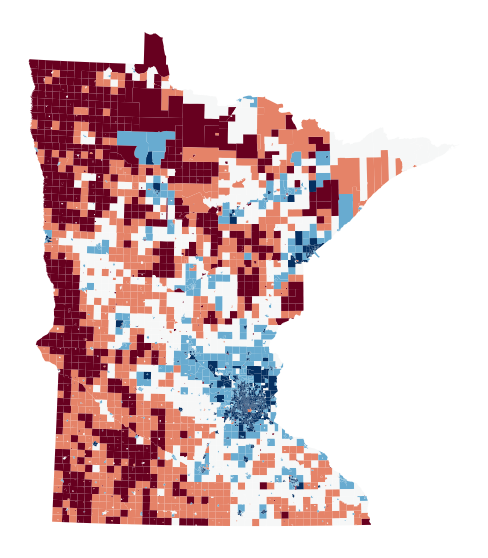

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(column='BARACK OBA', scheme='quantiles', cmap='RdBu', ax=ax)
ax.axis("off")
plt.show()

### Value-By-Alpha

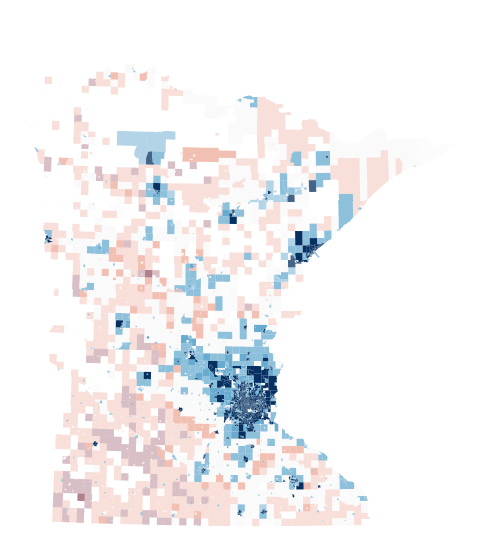

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
vba_choropleth(gdf['BARACK OBA'].values, 
               gdf['Total Resu'].values, 
               gdf, 
               rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', 
               ax=ax,
               revert_alpha=False )
ax.axis("off")
plt.show()

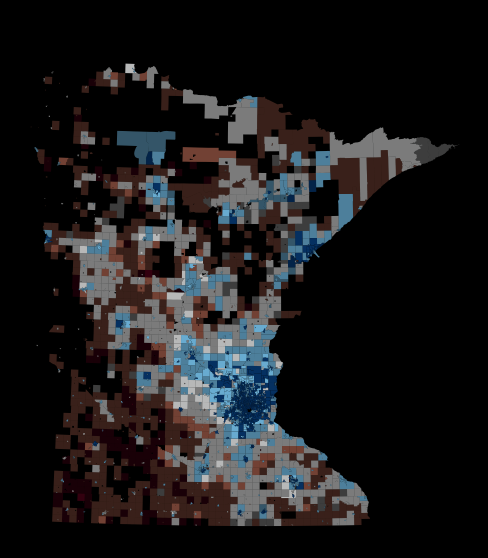

In [22]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,10))
vba_choropleth(gdf['BARACK OBA'].values, 
               gdf['Total Resu'].values,
               gdf, 
               rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu',
               ax=ax,
               revert_alpha=False,
               )
plt.show()

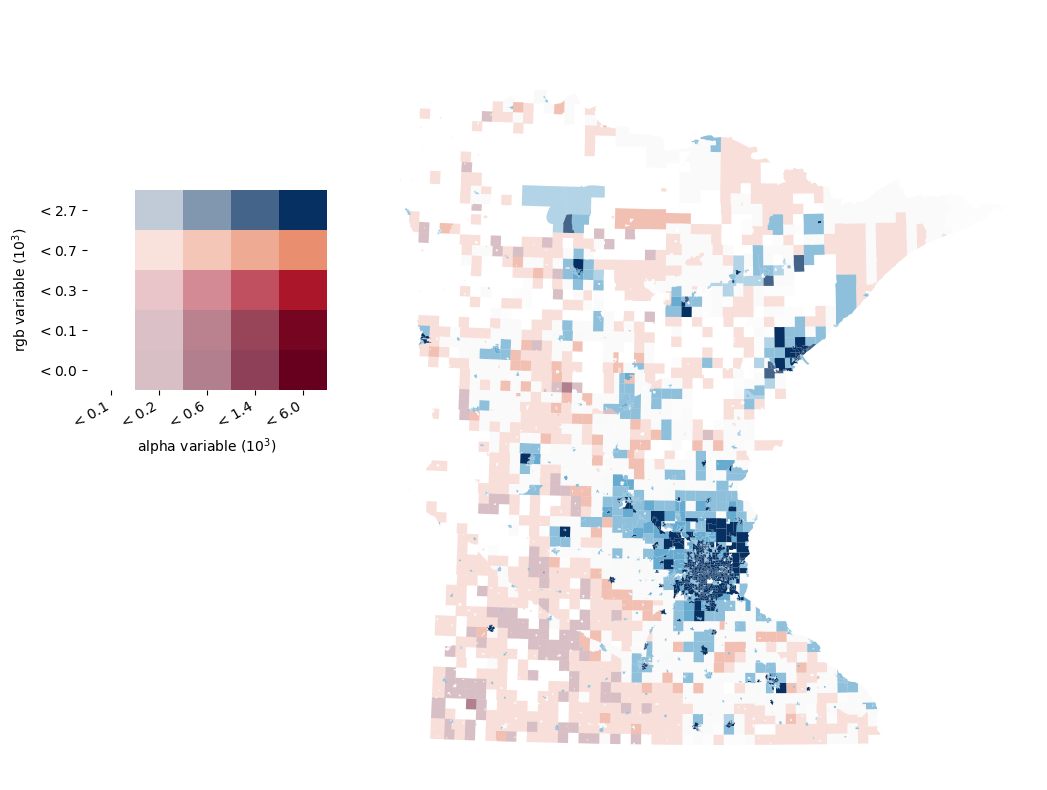

In [37]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,10))
vba_choropleth(gdf['BARACK OBA'].values, 
               gdf['Total Resu'].values,
               gdf, 
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               alpha_mapclassify=dict(classifier='quantiles', k = 5),
               cmap='RdBu',
               ax=ax,
               revert_alpha=False,
               legend = True
               )

plt.show()

In [29]:
cities = gpd.read_file("data/ne_10_populated_places.geojson")
cities = cities.to_crs("EPSG:26915")

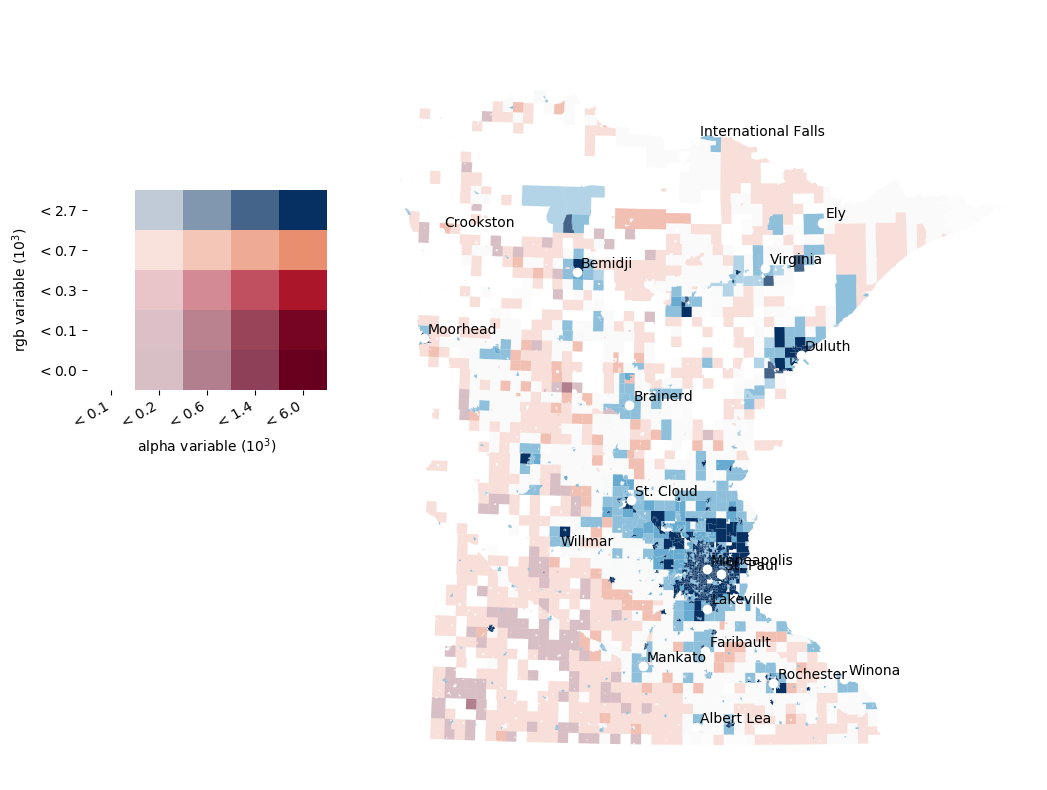

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
vba_choropleth(gdf['BARACK OBA'].values, 
               gdf['Total Resu'].values,
               gdf, 
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               alpha_mapclassify=dict(classifier='quantiles', k = 5),
               cmap='RdBu',
               ax=ax,
               revert_alpha=False,
               legend = True
               )
cities.plot(ax=ax, color = "white")
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.NAME):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
ax.axis("off")
plt.show()